In [7]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import Compose, ToTensor, Normalize
import numpy as np
import seaborn as sns
from random import choice
import math

In [8]:
def output_func(x):
    if np.sum(np.matmul(x,np.transpose(x))) >= math.sqrt(2/math.pi):
        return [0,1]
    else:
        return [1,0]

In [9]:
x = [np.random.uniform(low = 0, high = 1, size = 2) for i in range(1000)]
y = [output_func(u) for u in x]
data = [[torch.Tensor(x[i]).to('cuda:1'), torch.Tensor(y[i]).to('cuda:1')] for i in range(1000)]

In [10]:
dim_x, dim_y, dim_h, N = 2, 2, 4, 100

class Base(nn.Module):
    def __init__(self):
        super(Base, self).__init__()
        self.l1 = nn.Linear(dim_x, dim_h, bias = False)
        self.l2 = nn.Linear(dim_h, dim_y, bias = False)
    def forward(self, x):
        return (self.l2(torch.tanh(self.l1(x))))
    
class Model(nn.Module):
    def __init__(self, N):
        super(Model, self).__init__()
        self.layers = nn.ModuleList([Base() for i in range(N)])
    def forward(self, x):
        s = 0 
        for net in self.layers:
            s += net(x)
        return s/len(self.layers)

0 : tensor(0.5006, device='cuda:1', grad_fn=<MseLossBackward0>)
1000 : tensor(0.3019, device='cuda:1', grad_fn=<MseLossBackward0>)
2000 : tensor(0.2397, device='cuda:1', grad_fn=<MseLossBackward0>)
3000 : tensor(0.3439, device='cuda:1', grad_fn=<MseLossBackward0>)
4000 : tensor(0.2462, device='cuda:1', grad_fn=<MseLossBackward0>)
5000 : tensor(0.2546, device='cuda:1', grad_fn=<MseLossBackward0>)
6000 : tensor(0.2561, device='cuda:1', grad_fn=<MseLossBackward0>)
7000 : tensor(0.3405, device='cuda:1', grad_fn=<MseLossBackward0>)
8000 : tensor(0.2532, device='cuda:1', grad_fn=<MseLossBackward0>)
9000 : tensor(0.2637, device='cuda:1', grad_fn=<MseLossBackward0>)
0
Hidden Layer N is completed.
0 : tensor(0.5129, device='cuda:1', grad_fn=<MseLossBackward0>)
1000 : tensor(0.5009, device='cuda:1', grad_fn=<MseLossBackward0>)
2000 : tensor(0.4847, device='cuda:1', grad_fn=<MseLossBackward0>)
3000 : tensor(0.4723, device='cuda:1', grad_fn=<MseLossBackward0>)
4000 : tensor(0.4459, device='cuda:1'

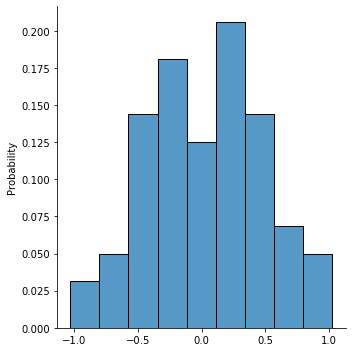

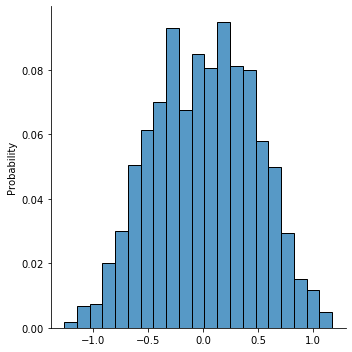

In [12]:
N_options = [10, 100]
t = 1000

for n in N_options:
    N=n
    model = Model(N)
    model.to('cuda:1')
    criterion = nn.MSELoss().to('cuda:1')
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
    for epoch in range (t*N):
        data_point = choice(data)
        inp = data_point[0]
        y = data_point[1]
        loss = criterion(model(inp), y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if epoch%1000 == 0:
            print(epoch, ":", loss)
            
    parameters = []
    j = 0
    for m in model.modules():
        if isinstance(m, nn.Linear):
            a = m.weight.reshape(-1)
            for i in range(len(a)):
                parameters.append(float(a[i].data))
            if j%1000 == 0:
                print(j)
            j+=1
    
    ax = sns.displot(parameters, stat = 'probability', kde = False)
    hidden_layers = str(N)
    ax.savefig("Tanh Sim Dataset: N=%s.png" % hidden_layers)
    print("Hidden Layer N is completed.")